In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
import cv2 as cv

In [9]:
data = pd.read_csv('/content/age_gender.csv')

## Converting pixels into numpy array
data['pixels'] = data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [32]:
gender_class = ['Male', 'Female']
ethnicity_class = ['White', 'Black', 'Asian', 'Indian', 'Other'] 

In [11]:
print('Total rows: {}'.format(len(data)))
print('Total columns: {}'.format(len(data.columns)))

Total rows: 23705
Total columns: 5


In [12]:
X = np.array(data['pixels'].tolist())

## Converting pixels from 1D to 3D
X = X.reshape(X.shape[0],48,48,1)
X = X / 255.0

# y = data['gender'].values
# y = data['age'].values
y = data['ethnicity'].values

In [13]:
def plot(X,y):
    for i in range(5):
        plt.title(y[i],)
        plt.imshow(X[i].reshape(48,48))
        plt.show()

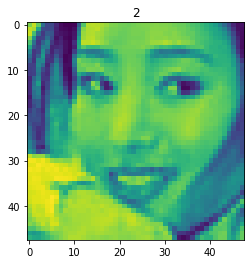

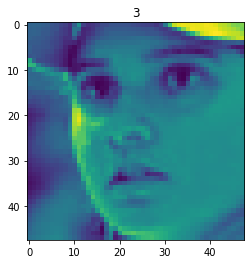

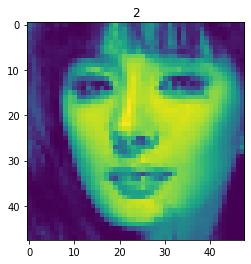

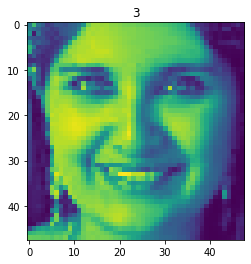

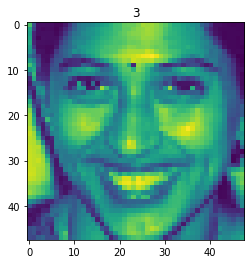

In [14]:
plot(X[6000:],y[6000:])

In [15]:
# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=37)

**################### MODEL FOR GENDER #####################**


In [11]:
# Build model for GENDER
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

**################### MODEL FOR ETHNICITY #####################**

In [16]:
# Build model for AGE
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='relu'))



# model = tf.keras.Sequential([
#     L.InputLayer(input_shape=(48,48,1)),
#     L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     L.MaxPooling2D((2, 2)),
#     L.Conv2D(64, (3, 3), activation='relu'),
#     L.MaxPooling2D((2, 2)),
#     L.Flatten(),
#     L.Dense(64, activation='relu'),
#     L.Dropout(rate=0.5),
#     L.Dense(5)
# ])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                409664    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

**################### MODEL FOR AGE #####################**

In [67]:
# Build model for AGE
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='relu'))


sgd = tf.keras.optimizers.SGD(momentum=0.9)


model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])


model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 128)        

In [17]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20
260/260 [==============================] - 4s 6ms/step - loss: 1.4201 - accuracy: 0.4500 - val_loss: 1.0338 - val_accuracy: 0.6241
Epoch 2/20
260/260 [==============================] - 1s 5ms/step - loss: 1.0816 - accuracy: 0.6160 - val_loss: 0.8747 - val_accuracy: 0.7047
Epoch 3/20
260/260 [==============================] - 1s 5ms/step - loss: 0.9540 - accuracy: 0.6770 - val_loss: 0.7705 - val_accuracy: 0.7404
Epoch 4/20
260/260 [==============================] - 1s 5ms/step - loss: 0.8794 - accuracy: 0.7033 - val_loss: 0.7501 - val_accuracy: 0.7528
Epoch 5/20
260/260 [==============================] - 1s 5ms/step - loss: 0.8363 - accuracy: 0.7184 - val_loss: 0.7218 - val_accuracy: 0.7610
Epoch 6/20
260/260 [==============================] - 1s 5ms/step - loss: 0.8127 - accuracy: 0.7284 - val_loss: 0.7214 - val_accuracy: 0.7610
Epoch 7/20
260/260 [==============================] - 1s 5ms/step - loss: 0.7854 - accuracy: 0.7376 - val_loss: 0.6805 - val_accuracy: 0.7712
Epoch 

In [18]:
# Measure Gender or Ethnicity
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.6533970236778259
Test Accuracy: 0.7946702241897583


In [59]:
# Measure Age
mse, mae = model.evaluate(X_test,y_test,verbose=0)
print('Test Mean squared error: {}'.format(mse))
print('Test Mean absolute error: {}'.format(mae))

Test Mean squared error: 120.8640365600586
Test Mean absolute error: 7.941391468048096


In [31]:
model.save('/content/ethnicity-pred.h5')

In [28]:
# Test single image from test set again
index = 3600
image = X_test[index]
print(y_test[index])
print(image.shape)
print(image)


1
(48, 48, 1)
[[[0.16862746]
  [0.09411765]
  [0.15294118]
  ...
  [0.2784314 ]
  [0.2       ]
  [0.32156864]]

 [[0.23137255]
  [0.14117648]
  [0.10196079]
  ...
  [0.29803923]
  [0.24313726]
  [0.3764706 ]]

 [[0.2       ]
  [0.10196079]
  [0.05882353]
  ...
  [0.27450982]
  [0.3019608 ]
  [0.45882353]]

 ...

 [[0.21568628]
  [0.3254902 ]
  [0.2627451 ]
  ...
  [0.5058824 ]
  [0.49411765]
  [0.49019608]]

 [[0.4509804 ]
  [0.47843137]
  [0.34901962]
  ...
  [0.6       ]
  [0.5058824 ]
  [0.5568628 ]]

 [[0.65882355]
  [0.57254905]
  [0.5019608 ]
  ...
  [0.69803923]
  [0.5921569 ]
  [0.5529412 ]]]


In [38]:
# Test uploaded image
file = "/content/male-2.jpg"
image = cv.imread(file, cv.IMREAD_GRAYSCALE)

In [39]:
image = cv.resize(image, (48, 48))
image = image.reshape(1, 48, 48, 1)
image = image.astype('float32') / 255.0
image = np.array(image)
# print(image.shape)
# print(image)

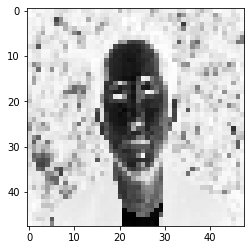

In [40]:
plt.imshow(image.reshape(48, 48),cmap='Greys')
plt.show()


In [41]:
pred = model.predict(image.reshape(1, 48, 48, 1), batch_size=1)[0]

print(pred.argmax())
print(ethnicity_class[pred.argmax()])


1
Predicted:  3
Black
